In [12]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn import preprocessing,  svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

In [14]:
df = pd.read_csv("datasets/trade.csv")


In [15]:

# criando feature de variacao do dia anterior
df_variacao = df[['Open', 'Close']]
df["var_dia_ant"] = df_variacao.diff(axis=1)["Close"]
df["var_dia_ant"] = df["var_dia_ant"].shift(-1)



In [16]:
#separando df de features, para traino, teste e validação
df_features = df[['Open', 'var_dia_ant']]
df_features_test2 = df_features.tail(100)
df_features.drop(df_features.tail(100).index, inplace=True)



/home/andre-basis/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
#separando df de labels, para traino, teste e validação
df_label = df[['Close']]
df_label_test2 = df_label.tail(100)
df_label.drop(df_label.tail(100).index, inplace=True)


/home/andre-basis/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_label, test_size=0.33, random_state=42)


In [19]:
lrmodel = LinearRegression(n_jobs=-1)

lrmodel.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [20]:
confidence = lrmodel.score(X_test, y_test)
print("Score obtido:",confidence)


Score obtido: 0.9962633068944434


In [21]:
# from datetime import datetime
#
# df["Date"] = df["Date"].str.replace(r'A.M.', '')
# df["Date"] = pd.to_datetime(df["Date"])
# df_dates = pd.DataFrame({"date":df["Date"].values.astype(np.int64)})


In [22]:
# Trando valor nao numérico resultado do shift up
df_features_test2.fillna(df_features_test2['var_dia_ant'].mean(), inplace=True)
result = lrmodel.predict(df_features_test2)


/home/andre-basis/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


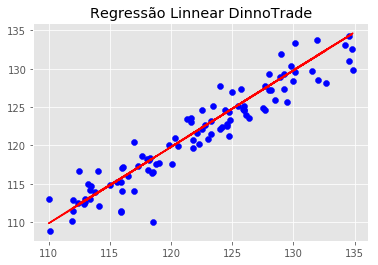

In [23]:
# Vizualização dos resultados
style.use('ggplot')
plt.title('Regressão Linnear DinnoTrade')
plt.scatter(df_features_test2["Open"], df_label_test2,  color='blue', label="valores reais")
plt.plot(df_features_test2["Open"], result, color='red', label="Valores previstos")
plt.show()
